<a href="https://colab.research.google.com/github/RiteshopShrivastava/Gold-Price-forecasting/blob/main/Gold_Prices_FbProphet_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 43.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from datetime import date
import plotly.express as px
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [ ]:
start='2018-01-01'
end=date.today().strftime('%Y-%m-%d')
data=yf.download('GC=F',start=start,end=end)[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail()

,Adj Close
Date,
2021-12-28,1810.199951
2021-12-29,1805.099976
2021-12-30,1812.699951
2021-12-31,1827.500000
2022-01-03,1799.400024


In [ ]:
training_size=data.shape[0]-30
training= data[:training_size]
test=data[training_size:]

In [ ]:
m=Prophet()

In [ ]:
training.reset_index(inplace=True)

In [ ]:
training.dtypes

Date         datetime64[ns]
Adj Close           float64
dtype: object

In [ ]:
training.columns=['ds','y']

In [ ]:
training

,ds,y
0,2018-01-02,1313.699951
1,2018-01-03,1316.199951
2,2018-01-04,1319.400024
3,2018-01-05,1320.300049
4,2018-01-08,1318.599976
...,...,...
974,2021-11-15,1866.099976
975,2021-11-16,1853.599976
976,2021-11-17,1869.699951
977,2021-11-18,1861.000000


In [ ]:
m.fit(training)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **Model Validation**

In [ ]:
future_prices=m.make_future_dataframe(periods=30)

In [ ]:
pred=m.predict(future_prices)

In [ ]:
pred[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1004,2021-12-15,1791.777209,1749.709827,1832.222294
1005,2021-12-16,1795.455497,1753.224228,1834.584192
1006,2021-12-17,1797.808688,1756.925964,1836.620475
1007,2021-12-18,1806.838237,1765.368394,1846.750192
1008,2021-12-19,1810.281382,1769.500625,1854.523475


In [ ]:
prediction_data=pred[['ds','yhat']]
pred=prediction_data[prediction_data.shape[0]-30:]

In [ ]:
pred

,ds,yhat
979,2021-11-20,1790.498075
980,2021-11-21,1788.721801
981,2021-11-22,1781.913018
982,2021-11-23,1780.366081
983,2021-11-24,1778.485053
984,2021-11-25,1777.136188
985,2021-11-26,1774.481827
986,2021-11-27,1778.595794
987,2021-11-28,1777.287268
988,2021-11-29,1771.162734


In [ ]:
y_pred=pred['yhat'].values
y_test=test['Adj Close'].values

In [ ]:
y_pred

array([1790.49807489, 1788.72180089, 1781.91301824, 1780.366081  ,
       1778.48505292, 1777.13618842, 1774.48182664, 1778.59579374,
       1777.28726758, 1771.16273394, 1770.51797186, 1769.75392757,
       1769.72909174, 1768.59340846, 1774.40381297, 1774.94835027,
       1770.80849888, 1772.25162894, 1773.64744275, 1775.82099874,
       1776.88733083, 1784.86774212, 1787.51470576, 1785.3749768 ,
       1788.68282395, 1791.77720924, 1795.45549718, 1797.80868785,
       1806.83823698, 1810.28138228])

In [ ]:
rmse=np.round(np.sqrt(mean_squared_error(y_test,y_pred)),2)

In [ ]:
print('RMSE of the data is : {}'.format(rmse))

RMSE of the data is : 13.72


### **Forecasting for next 30 days**

In [ ]:
import datetime
from datetime import date, timedelta, datetime
from pandas import DataFrame,to_datetime

future = list()
date= datetime.now()
for i in range(0, 30):
  date= date+ timedelta(days=1)
  future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2022-01-05 13:11:11.950984,1838.037190
1,2022-01-06 13:11:11.950984,1836.825565
2,2022-01-07 13:11:11.950984,1838.943752
3,2022-01-08 13:11:11.950984,1843.302828
4,2022-01-09 13:11:11.950984,1837.802186
5,2022-01-10 13:11:11.950984,1835.658065
6,2022-01-11 13:11:11.950984,1835.227145
7,2022-01-12 13:11:11.950984,1835.125573
8,2022-01-13 13:11:11.950984,1833.480958
9,2022-01-14 13:11:11.950984,1835.311353


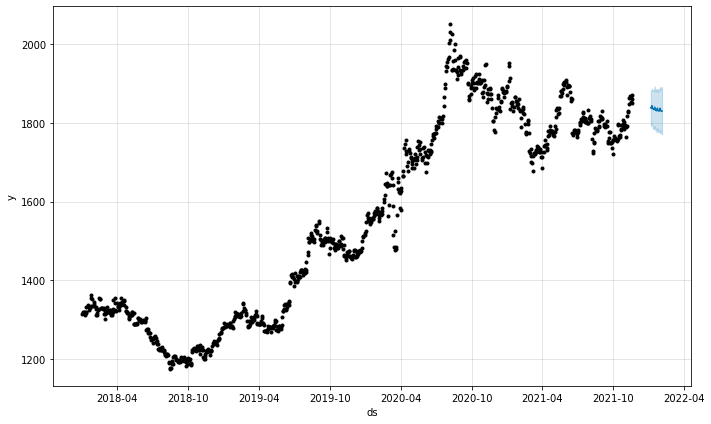

In [ ]:
m.plot(forecast)
plt.show()